In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

df.rename(columns={
    "Province/State": "State",
    "Country/Region": "Country"
}, inplace=True)

date_cols = [col for col in list(df.columns) if "/20" in col]

In [2]:
def get_country(country: str):
    return df.loc[df["Country"] == country]

def get_confirmed(country: str):
    return get_country(country)[date_cols].values.reshape(-1)

def select_thresh(arr, thresh=100):
    return arr[arr >= thresh].copy()


def log_evolution(country: str):
    return np.log10(select_thresh(get_confirmed(country)))

Text(0, 0.5, 'Logarytm z liczby zarażonych.')

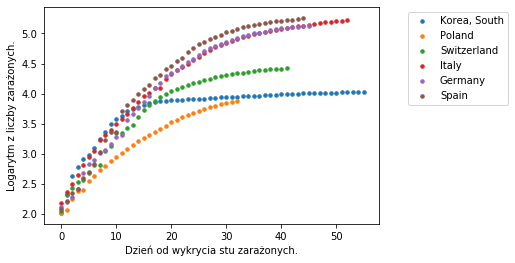

In [3]:
def plot_time(country: str):
    series = log_evolution(country)
    
    plt.scatter(np.arange(len(series)), series,
        label=country, s=12
    )

    
def plot_time_mult(lst: list):
    for cnt in lst:
        plot_time(cnt)

countries_list = [
    'Korea, South', 
    'Poland', 
    'Switzerland', 
    #'Japan',
    'Italy', 
    'Germany',
    #'France',
    'Spain',
    # 'United Kingdom', 
    #'US',
]

plot_time_mult(countries_list)
        
plt.legend(bbox_to_anchor=(1.4,1))
plt.xlabel('Dzień od wykrycia stu zarażonych.')
plt.ylabel('Logarytm z liczby zarażonych.')

Text(0, 0.5, 'Przyrost liczby zarażonych (logarytm)')

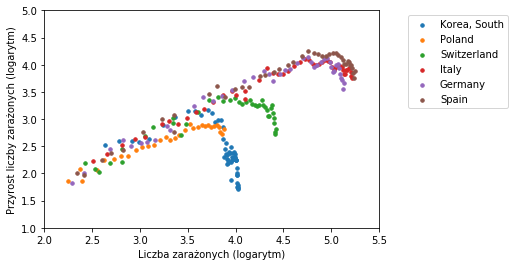

In [4]:
def plot_phase(country: str):
    countrydf =  select_thresh(get_confirmed(country))
    
    confirmed = countrydf[2:]
    increase = countrydf[2:] - countrydf[:-2]
    
    plt.scatter(np.log10(confirmed), np.log10(increase), label=country, s=12)

def plot_phase_mult(lst: list):
    for cnt in lst:
        plot_phase(cnt)
        
plot_phase_mult(countries_list)

plt.legend(bbox_to_anchor=(1.4,1))
plt.xlim(2, 5.5)
plt.ylim(1, 5)
plt.xlabel("Liczba zarażonych (logarytm)")
plt.ylabel("Przyrost liczby zarażonych (logarytm)")

Text(0.5, 0, 'Czas (dni)')

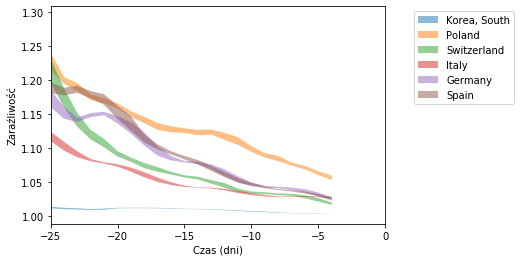

In [5]:
def reproduction_number(ys: list):
    xs = np.arange(len(ys))
    
    coeffs, cov = np.polyfit(xs, ys, 1, cov=True)

    mu = coeffs[0]
    pm = np.sqrt(cov[0, 0])
    return 10**(mu-pm), 10**(mu+pm)


def plot_reproduction(cnt: str):
    arr = log_evolution(cnt)
    x, ymin, ymax = [], [], []

    for days in range(-30, -3, 1):
        view = arr[(days-4):(days+3)]

        if len(view) < 7:
            continue
    
        x.append(days)
        
        y1, y2 = reproduction_number(view)
    
        ymin.append(y1)
        ymax.append(y2)
    
    plt.fill_between(x, ymin, ymax, alpha=0.5, label=cnt)
    

def plot_repr_mult(lst: list):
    for cnt in lst:
        plot_reproduction(cnt)
    

# plot_reproduction('Poland')
# plot_reproduction('Italy')
# plot_reproduction('United Kingdom')

plot_repr_mult(countries_list)


plt.legend(bbox_to_anchor=(1.4,1))
plt.xlim(-25, 0)

plt.ylabel("Zaraźliwość")
plt.xlabel("Czas (dni)")